In [8]:
# Imports and definitions
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import os
%matplotlib


Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
px = yf.download(['AAPL', 'TSLA', 'SPY', 'MSFT'], start='2021-01-01', end='2024-01-01')
px.head()

[*********************100%***********************]  4 of 4 completed


Price        Adj Close                          ...    Volume                      
Ticker            AAPL        MSFT         SPY  ...      MSFT        SPY       TSLA
Date                                            ...                                
2021-01-04  126.544212  210.844315  348.299347  ...  37130100  110210800  145914600
2021-01-05  128.108765  211.047668  350.698273  ...  23823000   66426200   96735600
2021-01-06  123.796432  205.575333  352.794983  ...  35930700  107997700  134100000
2021-01-07  128.020767  211.425415  358.036560  ...  27694500   68766800  154496700
2021-01-08  129.125793  212.713577  360.076569  ...  22956200   71677200  225166500

[5 rows x 24 columns]

<Axes: xlabel='Date'>

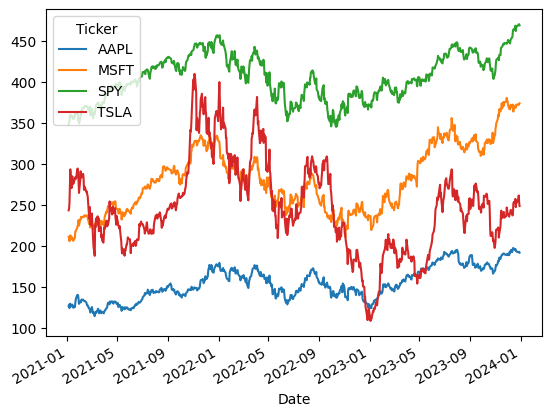

In [3]:
px['Adj Close'].plot()

In [4]:
px['Adj Close'].corr()

Ticker,AAPL,MSFT,SPY,TSLA
Ticker,,,,
AAPL,1.000000,0.873671,0.739990,0.310423
MSFT,0.873671,1.000000,0.898984,0.355374
SPY,0.739990,0.898984,1.000000,0.464138
TSLA,0.310423,0.355374,0.464138,1.000000


In [5]:
prices_df = px['Adj Close']

Check for missing Values

In [6]:
prices_df.isna().sum()

Ticker
AAPL    0
MSFT    0
SPY     0
TSLA    0
dtype: int64

Now that we have confirmed there is no missing data, we can continue with the preprocessing

### Normalize the Data

In [7]:
# Normailze use the min and max of the column
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(prices_df)

# Convert to a Data Frame
normalized_df = pd.DataFrame(normalized_data, columns= prices_df.columns, index= prices_df.index)
normalized_df.head()

Ticker,AAPL,MSFT,SPY,TSLA
Date,,,,
2021-01-04,0.151350,0.030101,0.024793,0.447731
2021-01-05,0.170157,0.031263,0.043914,0.453628
2021-01-06,0.118320,0.000000,0.060625,0.476673
2021-01-07,0.169099,0.033421,0.102403,0.542993
2021-01-08,0.182382,0.040780,0.118663,0.613642


FileNotFoundError: [Errno 2] No such file or directory: './data/scaler.pkl'

In [9]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        # The values from the sequence length to the data point 
        X.append(data[i:i+seq_length])

        # The end Data Point, the goal is using the 50,100,1000, etc values before to predict the current
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 100
spy_data = normalized_df['SPY'].values
X, y = create_sequences(spy_data, seq_len)

### Data Split
Now we can split the data into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (522, 100), Test shape: (131, 100)


### Save the Data
Now that we have confirmed the data to be the same length, we can save the training and testing data to the data folder

In [23]:
np.save('../data/X_train.npy', X_train)
np.save('../data/X_test.npy', X_test)
np.save('../data/y_train.npy', y_train)
np.save('../data/y_test.npy', y_test)